加载数据集：Img
加载完成：3701张图，61个类别
数据形状：(3701, 32, 32, 1)（样本数，高度，宽度，通道数）
像素值范围：0.0 ~ 1.0


/home/mochiao/code/.venv/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)              │ (None, 30, 30, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_13 (Conv2D)              │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_14 (Conv2D)              │ (None, 4, 4, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 2, 2, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_4 (Dropout)             │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 61)             │         7,869 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 166,205 (649.24 KB)

 Trainable params: 166,205 (649.24 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.0875 - loss: 4.0681 - val_accuracy: 0.1197 - val_loss: 3.9192
Epoch 2/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.1716 - loss: 3.4202 - val_accuracy: 0.2896 - val_loss: 2.6485
Epoch 3/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.3483 - loss: 2.4774 - val_accuracy: 0.5097 - val_loss: 1.9127
Epoch 4/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.4826 - loss: 1.8622 - val_accuracy: 0.6062 - val_loss: 1.5538
Epoch 5/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.5676 - loss: 1.4964 - val_accuracy: 0.6641 - val_loss: 1.2551
Epoch 6/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - accuracy: 0.6272 - loss: 1.2793 - val_accuracy: 0.6873 - val_loss: 1.1774
Epoch 7/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.6645 - loss: 1.1128 - val_accuracy: 0.7375 - val_loss: 1.0405
Epoch 8/120
73/73 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7147 - loss: 0.9595 - val_accuracy: 0.

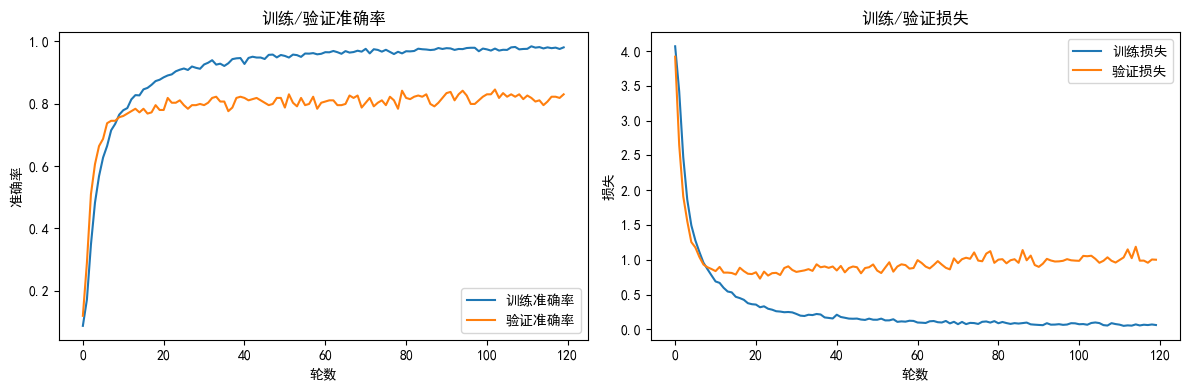

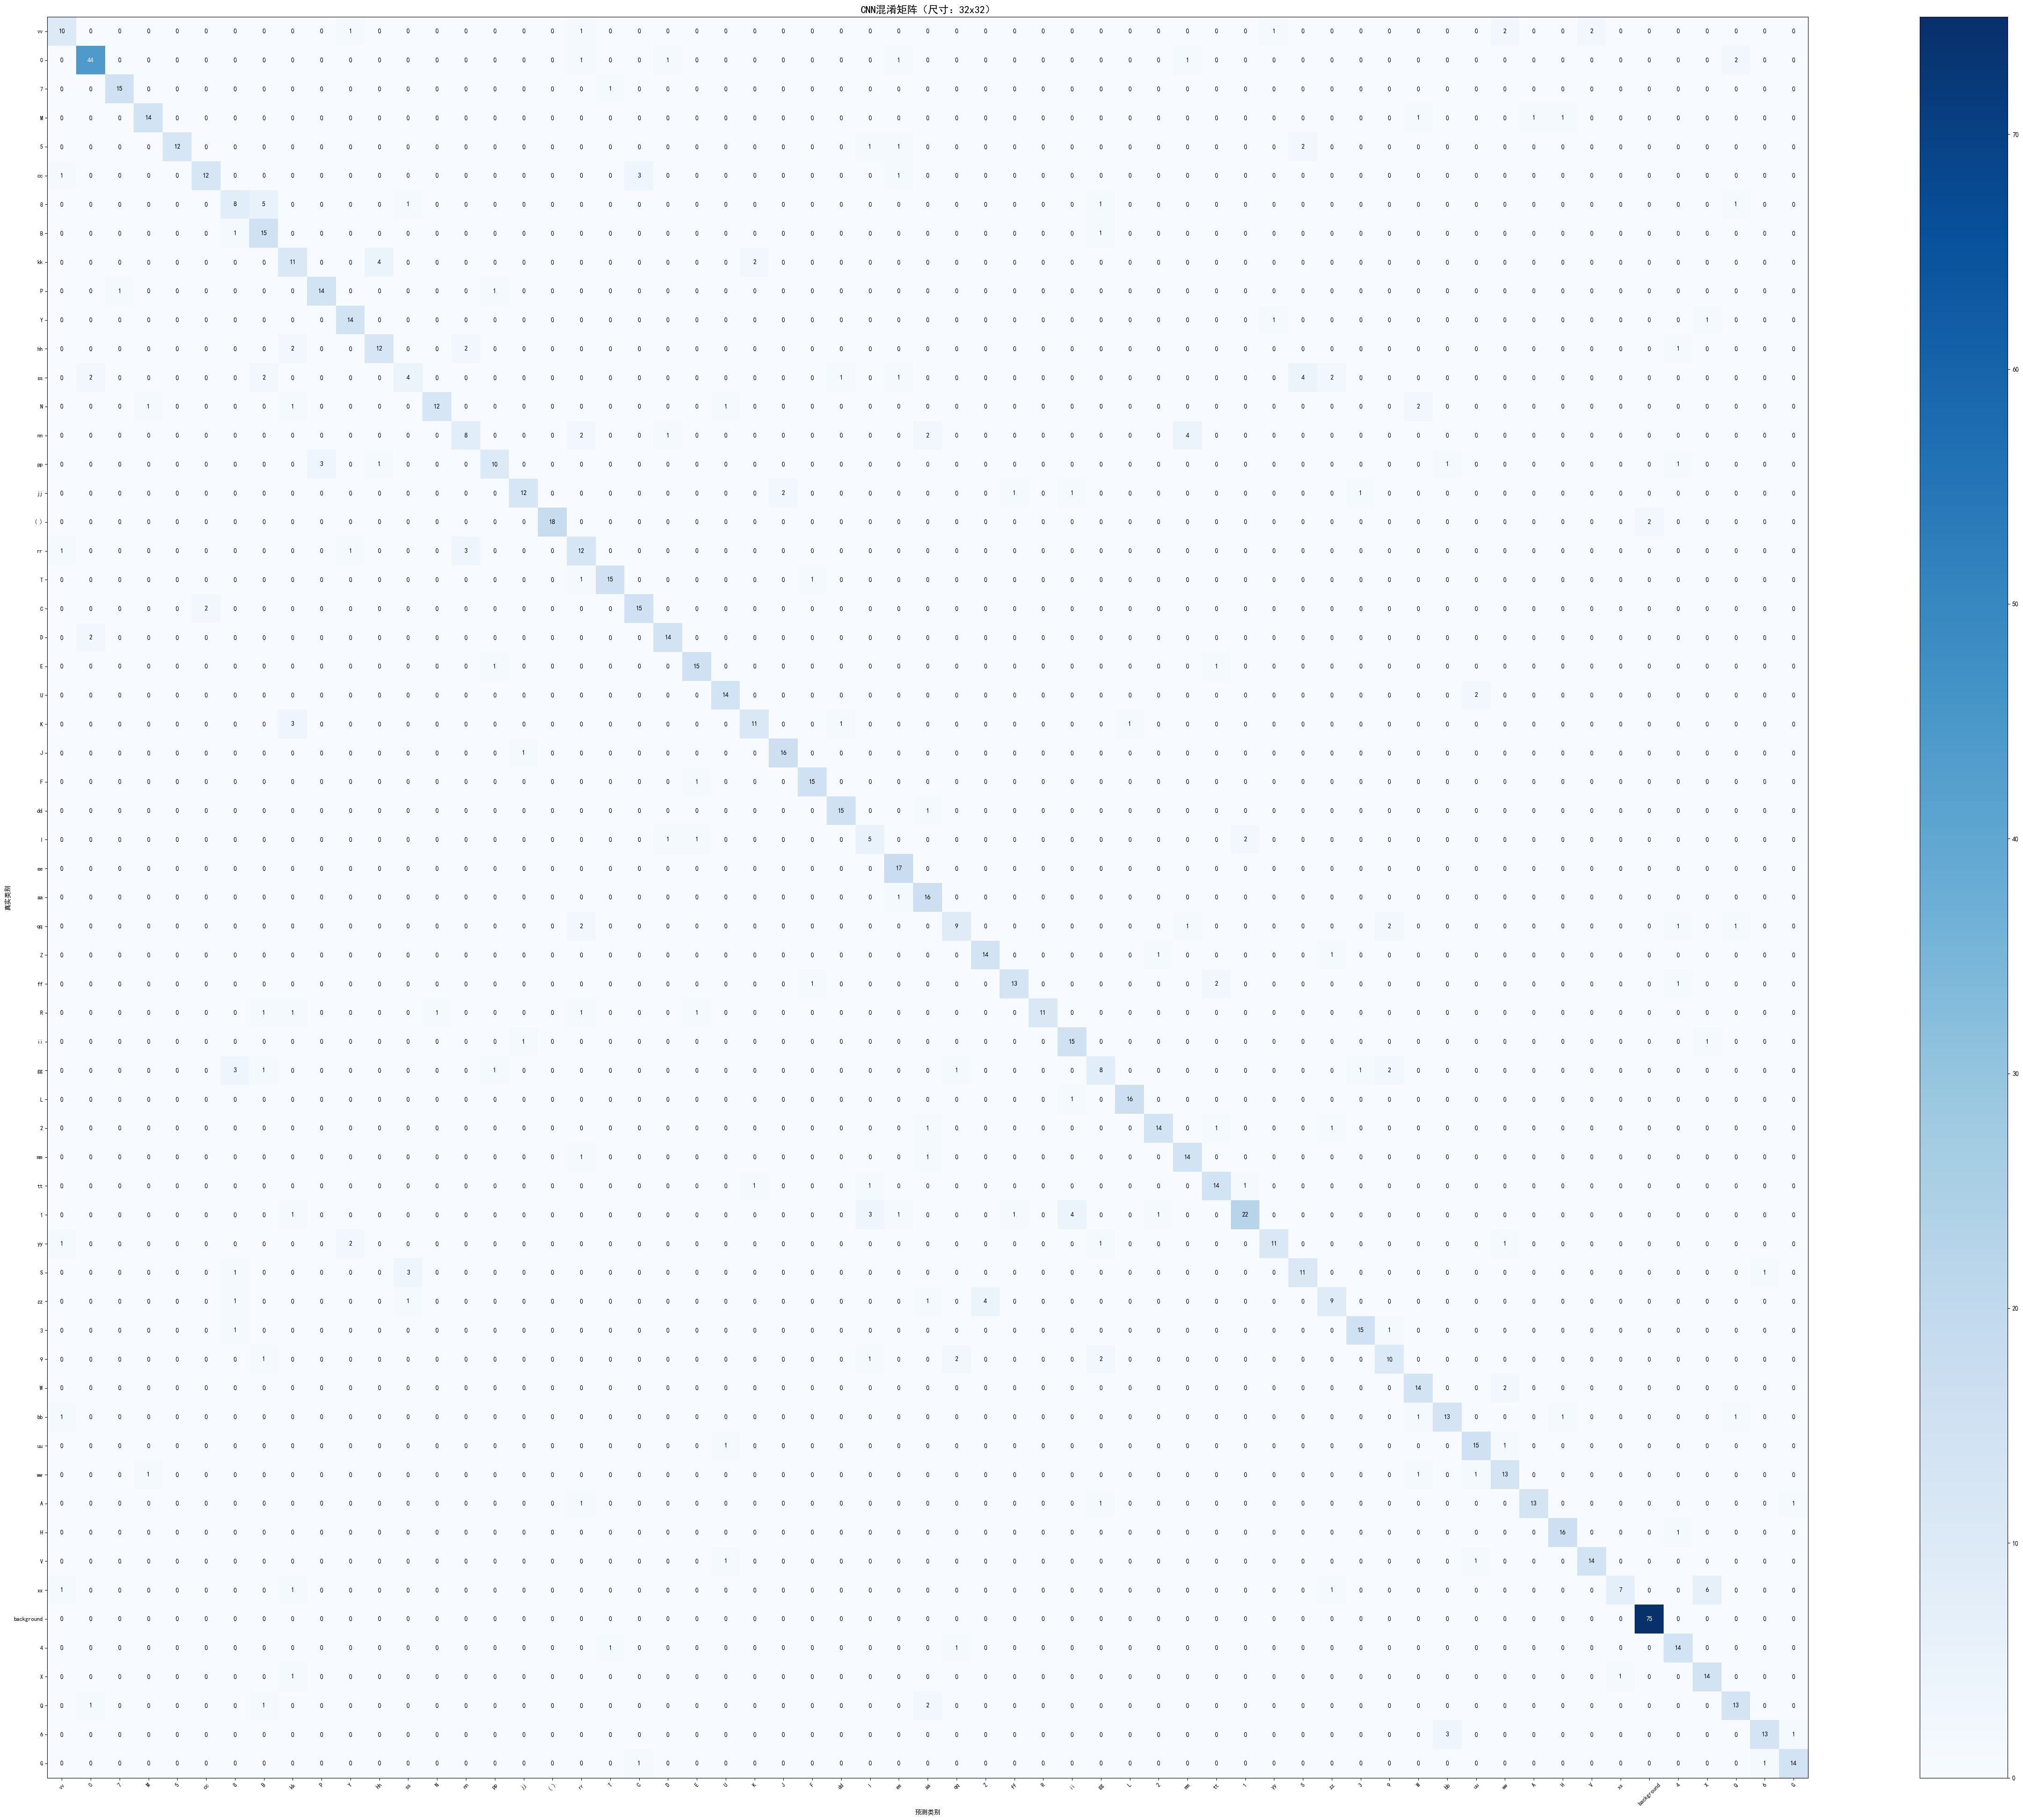

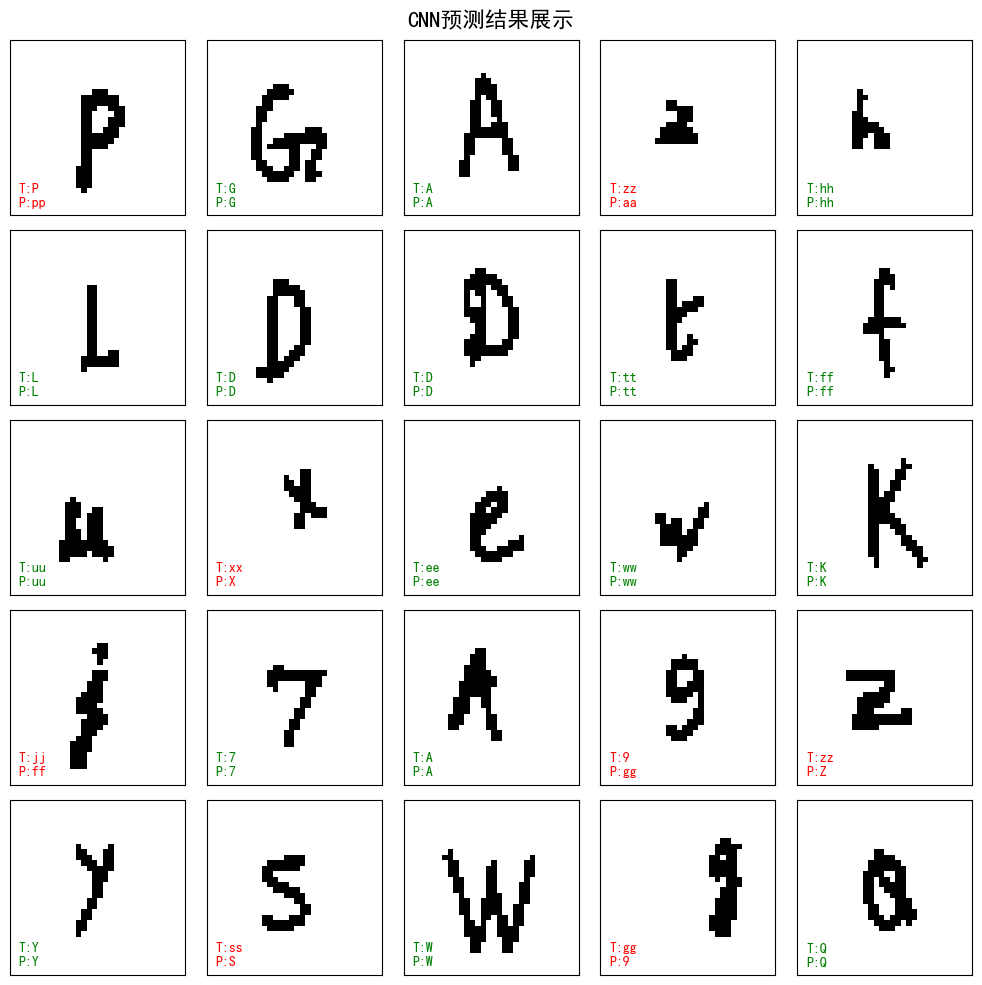

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['font.sans-serif'] = ['SimHei']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False    # 用来正常显示负号

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from PIL import Image

# ====== 数据集路径 ======
DATASET_PATH = "Img"
# =======================

# 配置参数
IMAGE_SIZE = (32, 32)  # 32x32的灰度图，兼顾细节和计算量
NUM_CHANNELS = 1  # 灰度图，通道数为1（彩色图是3）

# 1. 加载数据集
def load_custom_dataset(path, img_size):
    X = []
    y = []
    class_names = []
    
    for class_idx, class_name in enumerate(os.listdir(path)):
        class_path = os.path.join(path, class_name)
        if not os.path.isdir(class_path):
            continue
        class_names.append(class_name)
        
        # 只处理常见图片格式
        img_extensions = ('.png')
        for img_name in os.listdir(class_path):
            if not img_name.lower().endswith(img_extensions):
                continue
            img_path = os.path.join(class_path, img_name)
            
            try:
                # 读取并预处理图片
                img = Image.open(img_path).convert('L')  # 灰度图
                img = img.resize(img_size)  # 统一尺寸
                img_array = np.array(img)
                
                # 优化1：二值化（去掉灰度，只留纯黑/纯白，减少噪点干扰）
                img_array = (img_array < 127).astype(np.uint8) * 255  # 灰度<127→黑(0)，≥127→白(255)
                X.append(img_array)
                y.append(class_idx)
            except Exception as e:
                print(f"跳过损坏图片 {img_path}：{e}")
                continue
    
    # 转换为numpy数组
    X = np.array(X)
    y = np.array(y)
    if len(X) == 0:
        raise ValueError("数据集为空！检查路径是否正确")
    
    # 优化2：添加通道维度（CNN需要：(样本数, 高, 宽, 通道数)）
    X = np.expand_dims(X, axis=-1)  # 形状从 (N, 32, 32) → (N, 32, 32, 1)
    # 优化3：像素归一化（从0-255→0-1，符合CNN的输入习惯）
    X = X / 255.0
    
    return X, y, class_names

# 2. 加载数据并打印信息
print(f"加载数据集：{DATASET_PATH}")
X, y, class_names = load_custom_dataset(DATASET_PATH, IMAGE_SIZE)
num_classes = len(class_names)
print(f"加载完成：{X.shape[0]}张图，{num_classes}个类别")
print(f"数据形状：{X.shape}（样本数，高度，宽度，通道数）")
print(f"像素值范围：{np.min(X)} ~ {np.max(X)}")

# 3. 处理标签（转为独热编码，适配CNN分类）
y_one_hot = to_categorical(y, num_classes=num_classes)  # 比如标签3→[0,0,0,1,0,...]

# 4. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y_one_hot, test_size=0.3, random_state=42, stratify=y_one_hot if num_classes>1 else None
)
# 保留原始标签
y_train_original = np.argmax(y_train, axis=1)
y_test_original = np.argmax(y_test, axis=1)

# 5. 构建CNN模型
model = Sequential([
    # 卷积层1：提取基础边缘特征（32个3x3卷积核）
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], NUM_CHANNELS)),
    MaxPooling2D((2, 2)),  # 池化层：降维，保留关键特征
    
    # 卷积层2：提取更复杂的形状特征（64个3x3卷积核）
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # 卷积层3：进一步提取精细特征（128个3x3卷积核）
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    # 扁平化：将二维特征转为一维
    Flatten(),
    Dropout(0.5),  # 防止过拟合：随机丢弃50%的神经元
    # 全连接层：分类
    Dense(128, activation='relu'),
    Dense(num_classes, activation='softmax')  # 输出层：对应类别数，输出概率
])

# 编译模型
model.compile(
    optimizer='adam',  # 优化器：自适应学习率，训练更稳定
    loss='categorical_crossentropy',  # 损失函数：多分类问题
    metrics=['accuracy']  # 评估指标：准确率
)

# 打印模型结构
model.summary()

# 6. 训练模型
history = model.fit(
    X_train, y_train,
    epochs=120,  # 训练轮数
    batch_size=32,  # 批次大小
    validation_split=0.1,  # 用10%的训练集做验证，监控过拟合
    verbose=1
)

# 7. 评估模型
print("\n=== CNN evaluation ===")
# 预测测试集
y_pred = model.predict(X_test, verbose=0)
y_pred_original = np.argmax(y_pred, axis=1)  # 转回原始标签

# 计算准确率
accuracy = accuracy_score(y_test_original, y_pred_original)
print(f"测试集准确率：{accuracy:.4f}")

# 分类报告
print("\n分类报告：")
print(classification_report(
    y_test_original, 
    y_pred_original, 
    labels=range(len(class_names)),  # <--- 关键修改：显式指定要评估的所有标签索引
    target_names=class_names, 
    zero_division=0
))


# 8. 可视化训练过程（查看准确率/损失变化）
plt.figure(figsize=(12, 4))
# 准确率曲线
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='训练准确率')
plt.plot(history.history['val_accuracy'], label='验证准确率')
plt.title('训练/验证准确率')
plt.xlabel('轮数')
plt.ylabel('准确率')
plt.legend()

# 损失曲线
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='训练损失')
plt.plot(history.history['val_loss'], label='验证损失')
plt.title('训练/验证损失')
plt.xlabel('轮数')
plt.ylabel('损失')
plt.legend()
plt.tight_layout()
plt.show()

# 9. 混淆矩阵可视化
cm = confusion_matrix(y_test_original, y_pred_original)
fig_size = max(10, num_classes*0.8)
plt.figure(figsize=(fig_size, fig_size*0.8))
plt.imshow(cm, cmap=plt.cm.Blues)
plt.title(f'CNN混淆矩阵（尺寸：{IMAGE_SIZE[0]}x{IMAGE_SIZE[1]}）', fontsize=16)
plt.colorbar()
plt.xticks(np.arange(num_classes), class_names, rotation=45, fontsize=9)
plt.yticks(np.arange(num_classes), class_names, fontsize=9)
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i,j], ha="center", va="center",
                 color="white" if cm[i,j]>cm.max()/2 else "black")
plt.xlabel('预测类别')
plt.ylabel('真实类别')
plt.tight_layout()
plt.show()

# 10. 可视化预测结果
fig, axes = plt.subplots(5, 5, figsize=(10, 10))
for i, ax in enumerate(axes.flat):
    if i >= len(X_test):
        ax.axis('off')
        continue
    # 显示图片（去掉通道维度）
    img = X_test[i].reshape(IMAGE_SIZE)
    ax.imshow(img, cmap='binary')
    # 真实标签和预测标签
    true_label = class_names[y_test_original[i]]
    pred_label = class_names[y_pred_original[i]]
    color = 'green' if true_label==pred_label else 'red'
    ax.text(0.05, 0.05, f'T:{true_label}\nP:{pred_label}',
            transform=ax.transAxes, color=color, fontweight='bold')
    ax.set_xticks([])
    ax.set_yticks([])
plt.suptitle('CNN预测结果展示', fontsize=16)
plt.tight_layout()
plt.show()

ℹ️ 未检测到 NVIDIA 显卡，系统将使用 Intel Ultra 7 CPU 进行训练。
   (对于 32x32 的图像任务，Ultra 7 的 CPU 性能极强，速度会非常快。)
=== 1. 初始化数据管道 ===
Found 1052 files belonging to 61 classes.
Using 842 files for training.
Found 1052 files belonging to 61 classes.
Using 210 files for validation.
检测到 61 个类别: ['( )', '0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z', 'aa', 'background', 'bb', 'cc', 'dd', 'ee', 'ff', 'gg', 'hh', 'ii', 'jj', 'kk', 'mm', 'nn', 'pp', 'qq', 'rr', 'ss', 'tt', 'uu', 'vv', 'ww', 'xx', 'yy', 'zz']

=== 2. 构建 CNN 模型 ===


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_5 (InputLayer)      │ (None, 32, 32, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 32, 32, 32)     │           288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 32, 32, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 32, 32, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (None, 16, 16, 64)     │        18,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 16, 16, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_4 (Activation)       │ (None, 16, 16, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (None, 8, 8, 128)      │        73,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_5           │ (None, 8, 8, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_5 (Activation)       │ (None, 8, 8, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d_1      │ (None, 128)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 61)             │         7,869 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 117,725 (459.86 KB)

 Trainable params: 117,277 (458.11 KB)

 Non-trainable params: 448 (1.75 KB)


=== 3. 开始训练 (Intel Ultra 7 CPU Mode) ===
Epoch 1/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 3s 51ms/step - accuracy: 0.2767 - loss: 2.8412 - val_accuracy: 0.2857 - val_loss: 3.6365 - learning_rate: 0.0010
Epoch 2/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 2s 68ms/step - accuracy: 0.4038 - loss: 1.9258 - val_accuracy: 0.2524 - val_loss: 2.9756 - learning_rate: 0.0010
Epoch 3/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.4359 - loss: 1.7515 - val_accuracy: 0.2524 - val_loss: 3.6221 - learning_rate: 0.0010
Epoch 4/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 28ms/step - accuracy: 0.4596 - loss: 1.6413 - val_accuracy: 0.2524 - val_loss: 5.0365 - learning_rate: 0.0010
Epoch 5/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 24ms/step - accuracy: 0.4881 - loss: 1.5540 - val_accuracy: 0.2524 - val_loss: 5.6119 - learning_rate: 0.0010
Epoch 6/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 25ms/step - accuracy: 0.5071 - loss: 1.4753 - val_accuracy: 0.2524 - val_loss: 5.7916 - learning_rate: 0.0010
Epoch 7/120
27/27 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms

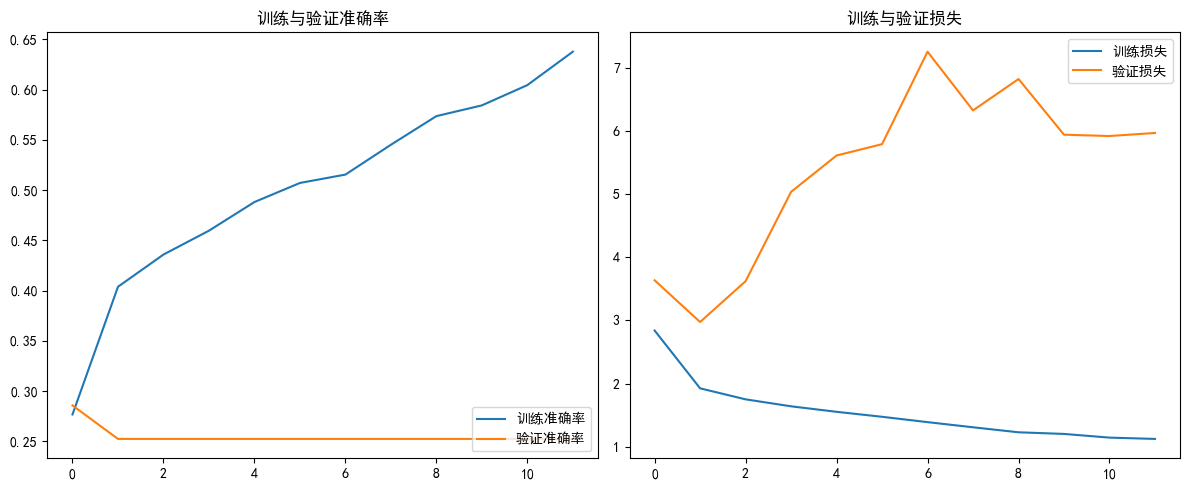

正在计算混淆矩阵，请稍候...

=== Classification Report (分类报告) ===


2025-12-18 22:22:57.829536: I tensorflow/core/framework/local_rendezvous.cc:407] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence


ValueError: Number of classes, 13, does not match size of target_names, 61. Try specifying the labels parameter

In [5]:
import os
import pathlib
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, callbacks
from sklearn.metrics import classification_report, confusion_matrix

# ====== 全局配置 (Configuration) ======
CONFIG = {
    "data_path": "Img",       # 数据集根目录
    "img_size": (32, 32),     # 图片尺寸
    "batch_size": 32,         # 批次大小
    "epochs": 120,            # 最大训练轮数
    "seed": 42,               # 随机种子
    "validation_split": 0.2   # 验证集比例
}

# ====== 1. 环境与硬件配置 (Environment Setup) ======
# 设置 Matplotlib 支持中文显示
plt.rcParams['font.sans-serif'] = ['SimHei']  # Windows系统常用字体
plt.rcParams['axes.unicode_minus'] = False

# Intel Ultra 7 专用配置：
# TensorFlow 默认寻找 NVIDIA GPU。如果没有找到，会自动回退到 CPU。
# 我们显式打印信息，避免因为看到红色警告而惊慌。
try:
    gpus = tf.config.list_physical_devices('GPU')
    if gpus:
        print(f"✅ 检测到独立显卡 (NVIDIA): {len(gpus)} 块")
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
    else:
        print("ℹ️ 未检测到 NVIDIA 显卡，系统将使用 Intel Ultra 7 CPU 进行训练。")
        print("   (对于 32x32 的图像任务，Ultra 7 的 CPU 性能极强，速度会非常快。)")
        # 启用 oneDNN 加速 (Intel CPU 优化库)
        os.environ['TF_ENABLE_ONEDNN_OPTS'] = '1'
except Exception as e:
    print(f"硬件配置提示: {e}")

# ====== 2. 数据流水线 (Data Pipeline) ======
def get_dataset(data_dir):
    """
    使用 tf.data 构建高效数据管道，包含自动加载、预处理和增强。
    """
    data_dir = pathlib.Path(data_dir)
    
    # A. 加载训练集 (Training Set)
    train_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=CONFIG["validation_split"],
        subset="training",
        seed=CONFIG["seed"],
        image_size=CONFIG["img_size"],
        batch_size=CONFIG["batch_size"],
        color_mode='grayscale',  # 强制单通道
        label_mode='categorical' # 强制 One-hot 编码
    )

    # B. 加载验证集 (Validation Set)
    val_ds = tf.keras.utils.image_dataset_from_directory(
        data_dir,
        validation_split=CONFIG["validation_split"],
        subset="validation",
        seed=CONFIG["seed"],
        image_size=CONFIG["img_size"],
        batch_size=CONFIG["batch_size"],
        color_mode='grayscale',
        label_mode='categorical'
    )
    
    class_names = train_ds.class_names
    num_classes = len(class_names)

    # C. 定义预处理函数 (Normalization + Binarization)
    def preprocess_image(image, label):
        # 1. 归一化到 [0, 1]
        image = tf.cast(image, tf.float32) / 255.0
        # 2. 二值化 (保留您原始逻辑：去噪)
        # 像素值 < 0.5 (原127) 变 0，否则变 1
        image = tf.where(image < 0.5, 0.0, 1.0) 
        return image, label

    # D. 定义数据增强 (Data Augmentation) - 仅用于训练
    data_augmentation = keras.Sequential([
        layers.RandomRotation(0.1), # 随机旋转 ±10%
        layers.RandomZoom(0.1),     # 随机缩放 ±10%
    ])

    # E. 管道性能优化 (Pipeline Optimization)
    AUTOTUNE = tf.data.AUTOTUNE

    # 训练集：预处理 -> 增强 -> 缓存 -> 打乱 -> 预取
    train_ds = train_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    train_ds = train_ds.map(lambda x, y: (data_augmentation(x, training=True), y), num_parallel_calls=AUTOTUNE)
    # train_ds = train_ds.cache() # 如果内存充足可开启，加速读取
    train_ds = train_ds.shuffle(1000)
    train_ds = train_ds.prefetch(buffer_size=AUTOTUNE)

    # 验证集：预处理 -> 缓存 -> 预取 (不做增强，不打乱)
    val_ds = val_ds.map(preprocess_image, num_parallel_calls=AUTOTUNE)
    # val_ds = val_ds.cache()
    val_ds = val_ds.prefetch(buffer_size=AUTOTUNE)

    return train_ds, val_ds, class_names, num_classes

# ====== 3. 模型构建 (Model Architecture) ======
def build_advanced_cnn(input_shape, num_classes):
    """
    构建现代化的 CNN 架构
    Structure: Conv -> BN -> ReLU -> Pooling -> GlobalAvg
    """
    inputs = layers.Input(shape=input_shape)
    
    # --- Block 1 ---
    x = layers.Conv2D(32, (3, 3), padding='same', use_bias=False)(inputs)
    x = layers.BatchNormalization()(x) # BN层加速收敛
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # --- Block 2 ---
    x = layers.Conv2D(64, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # --- Block 3 ---
    x = layers.Conv2D(128, (3, 3), padding='same', use_bias=False)(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.MaxPooling2D((2, 2))(x)
    
    # --- Classification Head ---
    # GlobalAveragePooling 替代 Flatten，大幅减少参数量，防过拟合
    x = layers.GlobalAveragePooling2D()(x)
    x = layers.Dropout(0.5)(x)
    x = layers.Dense(128, activation='relu')(x)
    outputs = layers.Dense(num_classes, activation='softmax')(x)
    
    model = models.Model(inputs, outputs)
    
    model.compile(
        optimizer='adam',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    return model

# ====== 4. 辅助绘图函数 (Visualization Helpers) ======
def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    epochs_range = range(len(acc))

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, acc, label='训练准确率')
    plt.plot(epochs_range, val_acc, label='验证准确率')
    plt.legend(loc='lower right')
    plt.title('训练与验证准确率')

    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, loss, label='训练损失')
    plt.plot(epochs_range, val_loss, label='验证损失')
    plt.legend(loc='upper right')
    plt.title('训练与验证损失')
    plt.tight_layout()
    plt.show()

def plot_confusion_matrix(model, dataset, class_names):
    # 提取真实标签和预测值
    print("正在计算混淆矩阵，请稍候...")
    y_true = []
    y_pred = []
    
    # 遍历整个验证集
    for images, labels in dataset:
        preds = model.predict(images, verbose=0)
        y_true.extend(np.argmax(labels.numpy(), axis=1))
        y_pred.extend(np.argmax(preds, axis=1))
        
    print("\n=== Classification Report (分类报告) ===")
    print(classification_report(y_true, y_pred, target_names=class_names, zero_division=0))
    
    cm = confusion_matrix(y_true, y_pred)
    
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, cmap=plt.cm.Blues)
    plt.title("Confusion Matrix (混淆矩阵)")
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45)
    plt.yticks(tick_marks, class_names)
    
    # 在格子里填数字
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            plt.text(j, i, cm[i, j],
                     horizontalalignment="center",
                     verticalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
            
    plt.ylabel('真实类别 (True)')
    plt.xlabel('预测类别 (Predicted)')
    plt.tight_layout()
    plt.show()

# ====== 5. 主程序 (Main Execution) ======
def main():
    # 检查路径
    if not os.path.exists(CONFIG['data_path']):
        print(f"❌ 错误：找不到路径 '{CONFIG['data_path']}'。请确保代码和Img文件夹在同一目录下。")
        return

    print("=== 1. 初始化数据管道 ===")
    train_ds, val_ds, class_names, num_classes = get_dataset(CONFIG['data_path'])
    print(f"检测到 {num_classes} 个类别: {class_names}")
    
    print("\n=== 2. 构建 CNN 模型 ===")
    input_shape = CONFIG['img_size'] + (1,) # (32, 32, 1)
    model = build_advanced_cnn(input_shape, num_classes)
    model.summary()

    # 设置 Callbacks (智能训练策略)
    my_callbacks = [
        # 早停：如果验证集损失 10 轮不下降，就停止训练
        callbacks.EarlyStopping(patience=10, restore_best_weights=True, monitor='val_loss'),
        # 动态学习率：如果验证集损失 5 轮不下降，学习率减半
        callbacks.ReduceLROnPlateau(factor=0.5, patience=5, min_lr=1e-6, monitor='val_loss'),
        # 保存最佳模型
        callbacks.ModelCheckpoint('best_model.keras', save_best_only=True, monitor='val_accuracy')
    ]

    print("\n=== 3. 开始训练 (Intel Ultra 7 CPU Mode) ===")
    history = model.fit(
        train_ds,
        validation_data=val_ds,
        epochs=CONFIG['epochs'],
        callbacks=my_callbacks,
        verbose=1
    )

    print("\n=== 4. 最终评估 ===")
    loss, accuracy = model.evaluate(val_ds)
    print(f"验证集准确率 (Validation Accuracy): {accuracy:.4f}")

    # 绘图
    plot_history(history)
    plot_confusion_matrix(model, val_ds, class_names)

if __name__ == '__main__':
    main()